In [ ]:
# Автор задач Karpov.Courses
# https://karpov.courses/analytics?_gl=1*k4q7fv*_ga*MTIzOTE2ODc5MS4xNzA4NDEyMTEy*_ga_DZP7KEXCQQ*MTcxMDQxMTg2OS41Ni4xLjE3MTA0MTUyODkuMTAuMC4w

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
path_to_file = '2_taxi_nyc.csv'
df = pd.read_csv(path_to_file, delimiter=',', encoding = 'windows-1251')

In [4]:
#Проверьте, сколько всего строк и столбцов имеется в датасете.
df.shape

(29101, 14)

In [5]:
#Давайте посмотрим на типы колонок. 
#Все ли из них считались правильно? 
#В качестве ответа выберите тип, преобладающий в датасете.
df.dtypes

pickup_dt        object
pickup_month     object
borough          object
pickups           int64
hday             object
spd             float64
vsb             float64
temp            float64
dewp            float64
slp             float64
pcp 01          float64
pcp 06          float64
pcp 24          float64
sd              float64
dtype: object

In [6]:
#Замените пробел в названиях на знак нижнего подчеркивания. 
corect = {"pcp 01": "pcp_01", "pcp 06": "pcp_06", "pcp 24":"pcp_24"}
df = df.rename(columns=corect)
df.tail()

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp_01,pcp_06,pcp_24,sd
29096,2015-06-30 23:00:00,Jun,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29097,2015-06-30 23:00:00,Jun,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29098,2015-06-30 23:00:00,Jun,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29099,2015-06-30 23:00:00,Jun,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29100,2015-06-30 23:00:00,Jun,NaN,3,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0


In [10]:
#Вас попросили узнать, сколько записей (строк) в датафрейме относятся к району Манхэттен (Manhattan).
# способ 1
df.query("borough == 'Manhattan'").shape[0]

4343

Второй способ узнать, сколько записей (строк) в датафрейме относятся к району Манхэттен (Manhattan).

In [9]:
df.borough.value_counts()

Queens           4343
Bronx            4343
EWR              4343
Manhattan        4343
Brooklyn         4343
Staten Island    4343
Name: borough, dtype: int64

In [11]:
#сколько раз встречается каждый из районов? 
#способ 3

df.groupby('borough', as_index=False).agg({'hday':'count'})

,borough,hday
0,Bronx,4343
1,Brooklyn,4343
2,EWR,4343
3,Manhattan,4343
4,Queens,4343
5,Staten Island,4343


In [35]:
df.drop(columns=['pickup_dt', 'pickup_month'])

,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp_01,pcp_06,pcp_24,sd
0,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29096,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29097,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29098,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29099,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0


In [16]:
#посчитайте общее количество поездок
all_pickups = df.pickups.sum()
all_pickups

14265773

In [21]:
#А теперь сгруппируйте данные по району (borough) и укажите, из какого пункта было совершено больше всего поездок.
# Способ 1
df = df.fillna('not_identified')
count_drive_by_borough = df.groupby('borough', as_index=False).agg({'pickups':'sum'})

In [25]:
# Способ 2
df.groupby('borough').pickups.sum().sort_values(ascending=False)

borough
Manhattan         10367841
Brooklyn           2321035
Queens             1343528
Bronx               220047
Staten Island         6957
not_identified        6260
EWR                    105
Name: pickups, dtype: int64

In [22]:
#Проверка группировки (что-то потеряли или нет)
sum_pickups_by_borough = count_drive_by_borough.pickups.sum()

if all_pickups == sum_pickups_by_borough:
    print('OK')
else:
    print(f'Error {all_pickups}!={sum_pickups_by_borough}')

OK


In [42]:
#из какого пункта было совершено больше всего поездок.
count_drive_by_borough.pickups.idxmax()
count_drive_by_borough.borough[count_drive_by_borough.pickups.idxmax()]

'Manhattan'

In [41]:
#из какого пункта было совершено меньше всего поездок.
min_pickups = count_drive_by_borough.borough.loc[count_drive_by_borough.pickups.idxmin()]
min_pickups


'EWR'

In [65]:
#Сгруппируйте данные по двум признакам: району города и является ли день выходным (колонки borough и hday). 
#Сравните среднее число поездок, и выберите районы, 
#из которых по праздникам в среднем поступает больше заказов, чем в обычные дни. 
new_df = df.groupby(['borough', 'hday'], as_index=False)\
    .aggregate({'pickups': 'mean'})\
    .reset_index()
new_df

,index,borough,hday,pickups
0,0,Bronx,N,50.771073
1,1,Bronx,Y,48.065868
2,2,Brooklyn,N,534.727969
3,3,Brooklyn,Y,527.011976
4,4,EWR,N,0.023467
5,5,EWR,Y,0.041916
6,6,Manhattan,N,2401.302921
7,7,Manhattan,Y,2035.928144
8,8,Queens,N,308.899904
9,9,Queens,Y,320.730539


In [66]:
def add_value_labels(ax, spacing=3):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.



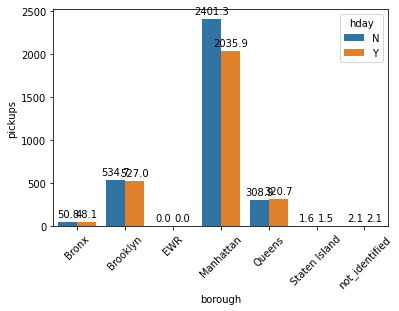

In [67]:
ax = sns.barplot(data = new_df, x="borough", y="pickups", hue='hday')
plt.xticks(rotation=45)

add_value_labels(ax)

In [69]:
#Для каждого района посчитайте число поездок по месяцам. Отсортируйте полученные значения по убыванию 
pickups_by_mon_bor = df.groupby(['borough', 'pickup_month'], as_index=False)\
    .agg({'pickups': 'sum'}).sort_values('pickups', ascending=False)
pickups_by_mon_bor

,borough,pickup_month,pickups
21,Manhattan,Jun,1995388
23,Manhattan,May,1888800
19,Manhattan,Feb,1718571
22,Manhattan,Mar,1661261
18,Manhattan,Apr,1648278
20,Manhattan,Jan,1455543
9,Brooklyn,Jun,482466
11,Brooklyn,May,476087
6,Brooklyn,Apr,378095
10,Brooklyn,Mar,346726


 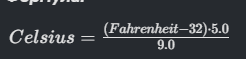

In [26]:
#Напишите функцию temp_to_celcius, которая получает на вход колонку с температурой в °F, 
#и возвращает значения, переведенные в градусы Цельсия.
def temp_to_celcius(temp):
    return (temp - 32) * 5 / 9

In [27]:
df['temp_Celsius'] = temp_to_celcius(df.temp.values)
df.head()

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp_01,pcp_06,pcp_24,sd,temp_Celsius
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.111111
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.111111
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.111111
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.111111
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,-1.111111
